In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("TRAIN.csv")

In [3]:
test = pd.read_csv("TEST.csv")

In [4]:
train.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [5]:
test.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,1,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,2,1543364124206,Uber,Financial District,Fenway,6.83,1.0,UberX
3,3,1543364124206,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,4,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
train.isnull().sum(), test.isnull().sum(),train.shape,test.shape,train.dtypes

(index               0
 time_stamp          0
 cab_provider        0
 source              0
 destination         0
 distance            0
 surge_multiplier    0
 cab_type            0
 fare                0
 dtype: int64,
 index               0
 time_stamp          0
 cab_provider        0
 source              0
 destination         0
 distance            0
 surge_multiplier    0
 cab_type            0
 dtype: int64,
 (100000, 9),
 (25000, 8),
 index                 int64
 time_stamp            int64
 cab_provider         object
 source               object
 destination          object
 distance            float64
 surge_multiplier    float64
 cab_type             object
 fare                float64
 dtype: object)

In [8]:
train['time_stamp'] = pd.to_datetime(train['time_stamp'], unit = 'ms')

In [9]:
test['time_stamp'] = pd.to_datetime(test['time_stamp'], unit = 'ms')

In [10]:
train["day"] = pd.to_datetime(train.time_stamp, format="%Y-%m-%d").dt.day
train["hour"] = pd.to_datetime(train.time_stamp, format="%Y-%m-%d").dt.hour
train["min"] = pd.to_datetime(train.time_stamp, format="%Y-%m-%d").dt.minute
train["sec"] = pd.to_datetime(train.time_stamp, format="%Y-%m-%d").dt.second


In [11]:
test["day"] = pd.to_datetime(test.time_stamp, format="%Y-%m-%d").dt.day
test["hour"] = pd.to_datetime(test.time_stamp, format="%Y-%m-%d").dt.hour
test["min"] = pd.to_datetime(test.time_stamp, format="%Y-%m-%d").dt.minute
test["sec"] = pd.to_datetime(test.time_stamp, format="%Y-%m-%d").dt.second


In [12]:
train.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,day,hour,min,sec
0,0,2018-11-26 03:40:46.318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,26,3,40,46
1,1,2018-11-26 03:40:46.319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,26,3,40,46
2,2,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,26,3,40,46
3,3,2018-11-26 03:40:46.320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,26,3,40,46
4,4,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,26,3,40,46


In [13]:
train.drop('index', axis = 1, inplace= True)

In [14]:
test.drop('index', axis = 1, inplace= True)

In [15]:
train.pop('time_stamp')
train.head()

,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,day,hour,min,sec
0,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,26,3,40,46
1,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,26,3,40,46
2,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,26,3,40,46
3,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,26,3,40,46
4,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,26,3,40,46


In [16]:
test.pop('time_stamp')
test.head()

,cab_provider,source,destination,distance,surge_multiplier,cab_type,day,hour,min,sec
0,Lyft,Theatre District,South Station,0.59,1.0,Lux,28,0,15,24
1,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL,28,0,15,24
2,Uber,Financial District,Fenway,6.83,1.0,UberX,28,0,15,24
3,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL,28,0,15,24
4,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL,28,0,15,24


In [17]:
train.describe()

,distance,surge_multiplier,fare,day,hour,min,sec
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.188783,1.014945,16.571013,26.718090,12.362020,28.973010,19.086030
std,1.142837,0.095462,9.333901,0.468166,6.913076,17.251708,6.726446
min,0.020000,1.000000,2.500000,26.000000,0.000000,0.000000,0.000000
25%,1.280000,1.000000,9.000000,26.000000,7.000000,15.000000,14.000000
50%,2.150000,1.000000,13.500000,27.000000,13.000000,29.000000,22.000000
75%,2.930000,1.000000,22.500000,27.000000,18.000000,44.000000,23.000000
max,7.500000,3.000000,92.000000,28.000000,23.000000,59.000000,58.000000


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

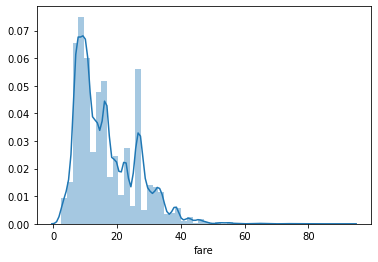

In [19]:
#fare the predictor variable (Numeric)
sns.distplot(train['fare'])
plt.show()

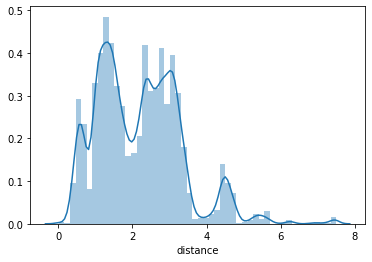

In [20]:

#distance the predictor variable (Numeric)
sns.distplot(train['distance'])
plt.show()


In [21]:
train.columns

Index(['cab_provider', 'source', 'destination', 'distance', 'surge_multiplier',
       'cab_type', 'fare', 'day', 'hour', 'min', 'sec'],
      dtype='object')

In [22]:
# A function to map the categorical levels to actual numbers. You can see the categorical levels above and use them for mapping.
def num_map(x):
    return x.map({'Black SUV': 12, "Lux Black XL": 11, "Lux Black": 10, "Black": 9, "Lux": 8, "Lyft XL": 7,
                  "UberXL": 6, "Lyft":5, "UberX":4, "WAV":3, "UberPool":2,"Shared":1})

In [23]:
train[['cab_type']] =train[['cab_type']].apply(num_map)
test[['cab_type']] =test[['cab_type']].apply(num_map)

In [24]:
#train.drop('cab_type', axis = 1, inplace = True)
##test.drop('cab_type', axis = 1, inplace = True)

In [24]:
train.head()

,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,day,hour,min,sec
0,Lyft,Boston University,Theatre District,3.03,1.0,11,34.0,26,3,40,46
1,Uber,South Station,Theatre District,1.30,1.0,9,18.5,26,3,40,46
2,Uber,Theatre District,Fenway,2.71,1.0,4,19.5,26,3,40,46
3,Lyft,Northeastern University,Beacon Hill,2.43,1.0,5,10.5,26,3,40,46
4,Uber,Theatre District,Fenway,2.71,1.0,6,32.0,26,3,40,46


In [26]:
#train.drop(['cab_provider', 'source','destination'], axis = 1, inplace = True)

In [27]:
#test.drop(['cab_provider', 'source','destination'], axis = 1, inplace = True)

In [25]:
test.head()

,cab_provider,source,destination,distance,surge_multiplier,cab_type,day,hour,min,sec
0,Lyft,Theatre District,South Station,0.59,1.0,8,28,0,15,24
1,Lyft,Theatre District,South Station,0.59,1.0,11,28,0,15,24
2,Uber,Financial District,Fenway,6.83,1.0,4,28,0,15,24
3,Uber,Beacon Hill,Haymarket Square,1.35,1.0,6,28,0,15,24
4,Lyft,Theatre District,South Station,0.59,1.0,7,28,0,15,24


In [25]:
# Subset all categorical variables
train_categorical = train.select_dtypes(include=['object'])
train_categorical.head()

,cab_provider,source,destination
0,Lyft,Boston University,Theatre District
1,Uber,South Station,Theatre District
2,Uber,Theatre District,Fenway
3,Lyft,Northeastern University,Beacon Hill
4,Uber,Theatre District,Fenway


In [26]:
test_categorical = test.select_dtypes(include = ['object'])

In [27]:
# Convert into dummies
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

,cab_provider_Uber,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
test_dummies = pd.get_dummies(test_categorical, drop_first=True)
test_dummies.head()

,cab_provider_Uber,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
train = pd.concat([train, train_dummies], axis=1)
train.head()

,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,day,hour,min,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,Lyft,Boston University,Theatre District,3.03,1.0,11,34.0,26,3,40,...,0,0,0,0,0,0,0,0,1,0
1,Uber,South Station,Theatre District,1.30,1.0,9,18.5,26,3,40,...,0,0,0,0,0,0,0,0,1,0
2,Uber,Theatre District,Fenway,2.71,1.0,4,19.5,26,3,40,...,0,1,0,0,0,0,0,0,0,0
3,Lyft,Northeastern University,Beacon Hill,2.43,1.0,5,10.5,26,3,40,...,0,0,0,0,0,0,0,0,0,0
4,Uber,Theatre District,Fenway,2.71,1.0,6,32.0,26,3,40,...,0,1,0,0,0,0,0,0,0,0


In [30]:
train.drop(['cab_provider', 'source','destination'], axis = 1, inplace = True)

In [31]:
train.head()

,distance,surge_multiplier,cab_type,fare,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,3.03,1.0,11,34.0,26,3,40,46,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.30,1.0,9,18.5,26,3,40,46,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2.71,1.0,4,19.5,26,3,40,46,1,0,...,0,1,0,0,0,0,0,0,0,0
3,2.43,1.0,5,10.5,26,3,40,46,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.71,1.0,6,32.0,26,3,40,46,1,0,...,0,1,0,0,0,0,0,0,0,0


In [32]:
test.drop(['cab_provider', 'source','destination'], axis = 1, inplace = True)

In [33]:
test = pd.concat([test, test_dummies], axis=1)
test.head()

,distance,surge_multiplier,cab_type,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,source_Boston University,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0.59,1.0,8,28,0,15,24,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.59,1.0,11,28,0,15,24,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,6.83,1.0,4,28,0,15,24,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.35,1.0,6,28,0,15,24,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.59,1.0,7,28,0,15,24,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
train.dtypes

distance                               float64
surge_multiplier                       float64
cab_type                                 int64
fare                                   float64
day                                      int64
hour                                     int64
min                                      int64
sec                                      int64
cab_provider_Uber                        uint8
source_Beacon Hill                       uint8
source_Boston University                 uint8
source_Fenway                            uint8
source_Financial District                uint8
source_Haymarket Square                  uint8
source_North End                         uint8
source_North Station                     uint8
source_Northeastern University           uint8
source_South Station                     uint8
source_Theatre District                  uint8
source_West End                          uint8
destination_Beacon Hill                  uint8
destination_B

In [34]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(train, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()


In [37]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['distance', 'surge_multiplier', 'cab_type','fare', 'day', 'hour','min', 'sec']


In [38]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\haris\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [39]:
df_train.head()

,distance,surge_multiplier,cab_type,fare,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
78763,0.049465,0.00,1.000000,0.279330,0.5,0.695652,0.915254,0.379310,1,0,...,0,0,0,0,0,0,0,1,0,0
71947,0.081551,0.00,0.727273,0.139665,0.5,0.608696,0.559322,0.362069,1,0,...,0,0,1,0,0,0,0,0,0,0
21641,0.287433,0.00,0.727273,0.173184,0.0,0.869565,0.644068,0.155172,1,0,...,0,0,0,0,0,0,0,1,0,0
61078,0.300802,0.00,0.727273,0.184358,0.5,0.434783,0.762712,0.379310,1,1,...,1,0,0,0,0,0,0,0,0,0
14736,0.306150,0.25,0.909091,0.480447,0.0,0.695652,0.186441,0.172414,0,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
y_train = df_train.pop('fare')
X_train = df_train

In [41]:
#Build a linear model

import statsmodels.api as sm
X_train = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train).fit()

lr.params

const                                 -0.057561
distance                               0.242002
surge_multiplier                       0.389633
cab_type                               0.277345
day                                    0.000783
hour                                   0.000311
min                                   -0.000449
sec                                   -0.001465
cab_provider_Uber                      0.013830
source_Beacon Hill                    -0.003450
source_Boston University              -0.006794
source_Fenway                         -0.005884
source_Financial District              0.003472
source_Haymarket Square               -0.001800
source_North End                       0.001643
source_North Station                   0.000048
source_Northeastern University        -0.008235
source_South Station                  -0.003541
source_Theatre District                0.005759
source_West End                        0.000603
destination_Beacon Hill               -0

In [44]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 1.456e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:48:51   Log-Likelihood:             1.2716e+05
No. Observations:               70000   AIC:                        -2.543e+05
Df Residuals:                   69970   BIC:                        -2.540e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

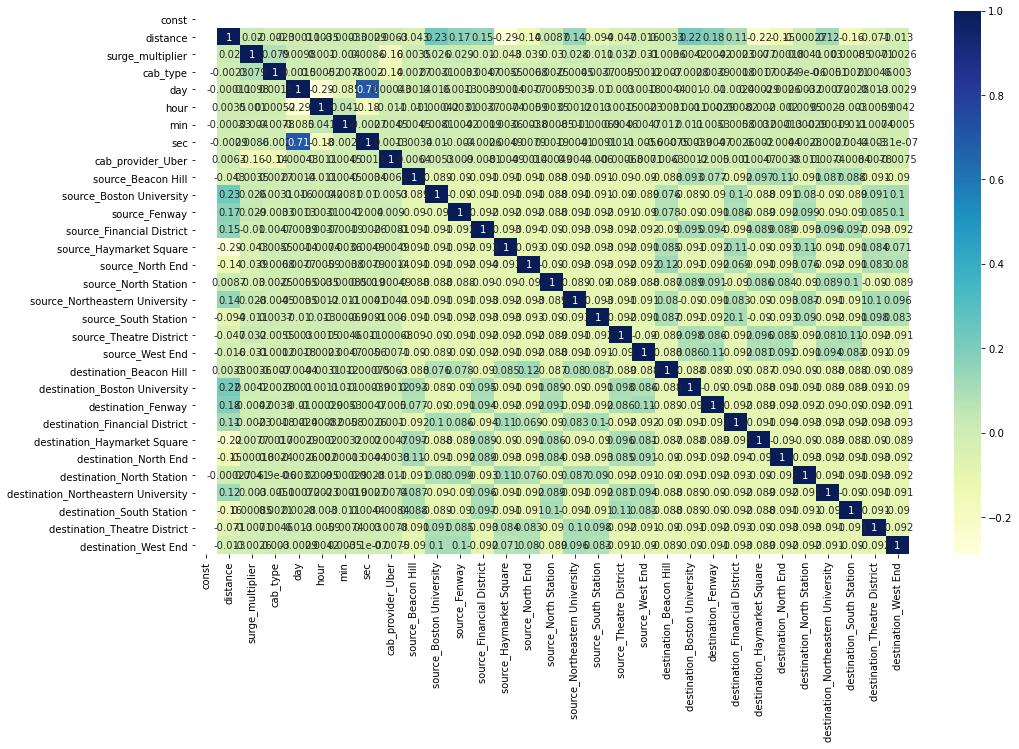

In [45]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\haris\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\haris\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
11,source_Fenway,inf
10,source_Boston University,inf
17,source_South Station,inf
16,source_Northeastern University,inf
24,destination_Haymarket Square,inf
14,source_North End,inf
13,source_Haymarket Square,inf
22,destination_Fenway,inf
21,destination_Boston University,inf
25,destination_North End,inf


In [48]:
type(vif)

pandas.core.frame.DataFrame

In [55]:
vif.columns

Index(['Features', 'VIF'], dtype='object')

In [44]:
#X_train.columns

In [45]:
#vif_1 = vif.loc[vif['VIF'] <= 2.13]


In [46]:
#vif_1

In [47]:
X_train.drop(['source_Fenway', 'source_Boston University'], axis = 1, inplace = True)


In [48]:
X_train.drop(['source_South Station', 'source_Northeastern University', 'destination_Haymarket Square',
             'source_North End','source_Haymarket Square','destination_Fenway',
             'destination_Boston University','destination_North End','destination_Northeastern University','destination_South Station'], axis = 1, inplace = True)


In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.48
4,day,2.13
7,sec,2.01
10,source_Financial District,1.41
15,destination_Financial District,1.40
17,destination_Theatre District,1.38
16,destination_North Station,1.38
13,source_West End,1.37
12,source_Theatre District,1.37
9,source_Beacon Hill,1.37


In [49]:
X_train.head()

,const,distance,surge_multiplier,cab_type,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,source_Financial District,source_North Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Financial District,destination_North Station,destination_Theatre District,destination_West End
78763,1.0,0.049465,0.00,1.000000,0.5,0.695652,0.915254,0.379310,1,0,1,0,0,0,0,0,0,0,0
71947,1.0,0.081551,0.00,0.727273,0.5,0.608696,0.559322,0.362069,1,0,0,0,0,0,0,1,0,0,0
21641,1.0,0.287433,0.00,0.727273,0.0,0.869565,0.644068,0.155172,1,0,0,1,0,0,0,0,0,0,0
61078,1.0,0.300802,0.00,0.727273,0.5,0.434783,0.762712,0.379310,1,1,0,0,0,0,0,0,0,0,0
14736,1.0,0.306150,0.25,0.909091,0.0,0.695652,0.186441,0.172414,0,0,0,0,0,0,0,0,1,0,0


In [50]:
lr_2 = sm.OLS(y_train, X_train).fit()

In [51]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 2.337e+04
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:48:22   Log-Likelihood:             1.2704e+05
No. Observations:               70000   AIC:                        -2.540e+05
Df Residuals:                   69981   BIC:                        -2.539e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [52]:
y_pred = lr_2.predict(X_train)

Text(0.5, 0, 'Errors')

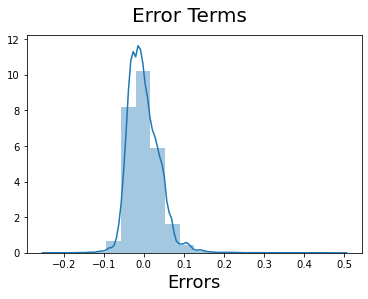

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [54]:
X_train.shape

(70000, 19)

In [55]:
df_test.drop(['source_South Station', 'source_Northeastern University', 'destination_Haymarket Square',
             'source_North End','source_Haymarket Square','destination_Fenway',
             'destination_Boston University','destination_North End','destination_Northeastern University','destination_South Station'], axis = 1, inplace = True)

C:\Users\haris\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
df_test.head()

,distance,surge_multiplier,cab_type,fare,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,...,source_Fenway,source_Financial District,source_North Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Financial District,destination_North Station,destination_Theatre District,destination_West End
22422,2.83,1.0,8,19.5,26,21,8,9,0,0,...,1,0,0,0,0,0,0,0,0,1
25747,2.15,1.0,11,30.0,26,22,54,10,0,0,...,0,0,0,1,0,0,0,0,0,0
13795,4.11,1.0,10,32.5,26,15,32,9,0,0,...,1,0,0,0,0,0,1,0,0,0
68724,2.61,1.0,3,10.5,27,13,24,23,1,0,...,0,0,0,0,0,1,0,0,0,0
38923,1.04,1.0,4,9.5,27,3,0,23,1,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\haris\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\haris\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [58]:
df_test.head()

,distance,surge_multiplier,cab_type,fare,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,...,source_Fenway,source_Financial District,source_North Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Financial District,destination_North Station,destination_Theatre District,destination_West End
22422,0.375668,0.0,0.636364,0.189944,0.0,0.913043,0.135593,0.155172,0,0,...,1,0,0,0,0,0,0,0,0,1
25747,0.284759,0.0,0.909091,0.307263,0.0,0.956522,0.915254,0.172414,0,0,...,0,0,0,1,0,0,0,0,0,0
13795,0.546791,0.0,0.818182,0.335196,0.0,0.652174,0.542373,0.155172,0,0,...,1,0,0,0,0,0,1,0,0,0
68724,0.346257,0.0,0.181818,0.089385,0.5,0.565217,0.406780,0.396552,1,0,...,0,0,0,0,0,1,0,0,0,0
38923,0.136364,0.0,0.272727,0.078212,0.5,0.130435,0.000000,0.396552,1,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
y_test = df_test.pop('fare')
X_test = df_test

In [60]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(X_test)

In [61]:
X_test.shape

(30000, 20)

In [62]:
X_train.shape

(70000, 19)

In [63]:
X_test.shape

(30000, 20)

In [69]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [71]:
X_test.shape

(30000, 21)

In [72]:
X_train.shape

(70000, 19)

In [70]:
X_test.columns

Index(['const', 'distance', 'surge_multiplier', 'cab_type', 'day', 'hour',
       'min', 'sec', 'cab_provider_Uber', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_North Station',
       'source_Theatre District', 'source_West End', 'destination_Beacon Hill',
       'destination_Financial District', 'destination_North Station',
       'destination_Theatre District', 'destination_West End'],
      dtype='object')

In [68]:
X_train.columns

Index(['const', 'distance', 'surge_multiplier', 'cab_type', 'day', 'hour',
       'min', 'sec', 'cab_provider_Uber', 'source_Beacon Hill',
       'source_Financial District', 'source_North Station',
       'source_Theatre District', 'source_West End', 'destination_Beacon Hill',
       'destination_Financial District', 'destination_North Station',
       'destination_Theatre District', 'destination_West End'],
      dtype='object')

In [73]:
X_test.drop(['source_Fenway', 'source_Boston University'], axis = 1, inplace = True)


In [74]:
y_pred_test = lr_2.predict(X_test)

Text(0.5, 0, 'Errors')

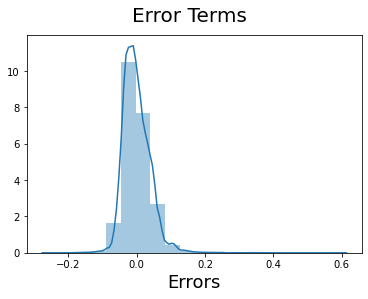

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [77]:
from sklearn import metrics


In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.029962041353277732
MSE: 0.001550073357468335
RMSE: 0.03937097099981578


In [79]:
X_test.head()

,const,distance,surge_multiplier,cab_type,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,source_Financial District,source_North Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Financial District,destination_North Station,destination_Theatre District,destination_West End
22422,1.0,0.375668,0.0,0.636364,0.0,0.913043,0.135593,0.155172,0,0,0,0,0,0,0,0,0,0,1
25747,1.0,0.284759,0.0,0.909091,0.0,0.956522,0.915254,0.172414,0,0,0,0,1,0,0,0,0,0,0
13795,1.0,0.546791,0.0,0.818182,0.0,0.652174,0.542373,0.155172,0,0,0,0,0,0,0,1,0,0,0
68724,1.0,0.346257,0.0,0.181818,0.5,0.565217,0.406780,0.396552,1,0,0,0,0,0,1,0,0,0,0
38923,1.0,0.136364,0.0,0.272727,0.5,0.130435,0.000000,0.396552,1,0,0,0,0,0,0,1,0,0,0


In [80]:
test.head()

,distance,surge_multiplier,cab_type,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,source_Boston University,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0.59,1.0,8,28,0,15,24,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.59,1.0,11,28,0,15,24,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,6.83,1.0,4,28,0,15,24,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.35,1.0,6,28,0,15,24,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.59,1.0,7,28,0,15,24,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
test.drop(['source_South Station', 'source_Northeastern University', 'destination_Haymarket Square',
             'source_North End','source_Haymarket Square','destination_Fenway',
             'destination_Boston University','destination_North End','destination_Northeastern University','destination_South Station','source_Fenway', 'source_Boston University'], axis = 1, inplace = True)

In [83]:
test.head()

,distance,surge_multiplier,cab_type,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,source_Financial District,source_North Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Financial District,destination_North Station,destination_Theatre District,destination_West End
0,0.59,1.0,8,28,0,15,24,0,0,0,0,1,0,0,0,0,0,0
1,0.59,1.0,11,28,0,15,24,0,0,0,0,1,0,0,0,0,0,0
2,6.83,1.0,4,28,0,15,24,1,0,1,0,0,0,0,0,0,0,0
3,1.35,1.0,6,28,0,15,24,1,1,0,0,0,0,0,0,0,0,0
4,0.59,1.0,7,28,0,15,24,0,0,0,0,1,0,0,0,0,0,0


In [84]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars_test = ['distance', 'surge_multiplier', 'cab_type', 'day', 'hour','min', 'sec']

In [86]:
test[num_vars_test] = scaler.fit_transform(test[num_vars_test])

In [87]:
test.head()

,distance,surge_multiplier,cab_type,day,hour,min,sec,cab_provider_Uber,source_Beacon Hill,source_Financial District,source_North Station,source_Theatre District,source_West End,destination_Beacon Hill,destination_Financial District,destination_North Station,destination_Theatre District,destination_West End
0,0.075000,0.0,0.636364,0.0,0.0,0.254237,0.40678,0,0,0,0,1,0,0,0,0,0,0
1,0.075000,0.0,0.909091,0.0,0.0,0.254237,0.40678,0,0,0,0,1,0,0,0,0,0,0
2,0.896053,0.0,0.272727,0.0,0.0,0.254237,0.40678,1,0,1,0,0,0,0,0,0,0,0
3,0.175000,0.0,0.454545,0.0,0.0,0.254237,0.40678,1,1,0,0,0,0,0,0,0,0,0
4,0.075000,0.0,0.545455,0.0,0.0,0.254237,0.40678,0,0,0,0,1,0,0,0,0,0,0


In [88]:
# Adding constant variable to test dataframe
test = sm.add_constant(test)

In [89]:
y_test_prediction = lr_2.predict(test)

In [90]:
y_test_prediction

0        0.138239
1        0.213878
2        0.241836
3        0.115852
4        0.113025
           ...   
24995    0.071380
24996    0.096593
24997    0.323513
24998    0.032823
24999    0.209316
Length: 25000, dtype: float64

In [91]:
fare_test_3 = pd.DataFrame(y_test_prediction, columns = ['fare'])
fare_test_3.head()

,fare
0,0.138239
1,0.213878
2,0.241836
3,0.115852
4,0.113025


In [92]:
fare_test_3.to_csv('submission.csv')